In [1]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   reset_network, run_network)
from snn_dpe.tools.plotting import plot_network, plot_spikes

iris_data_location = '../../Datasets/Iris/iris.data'

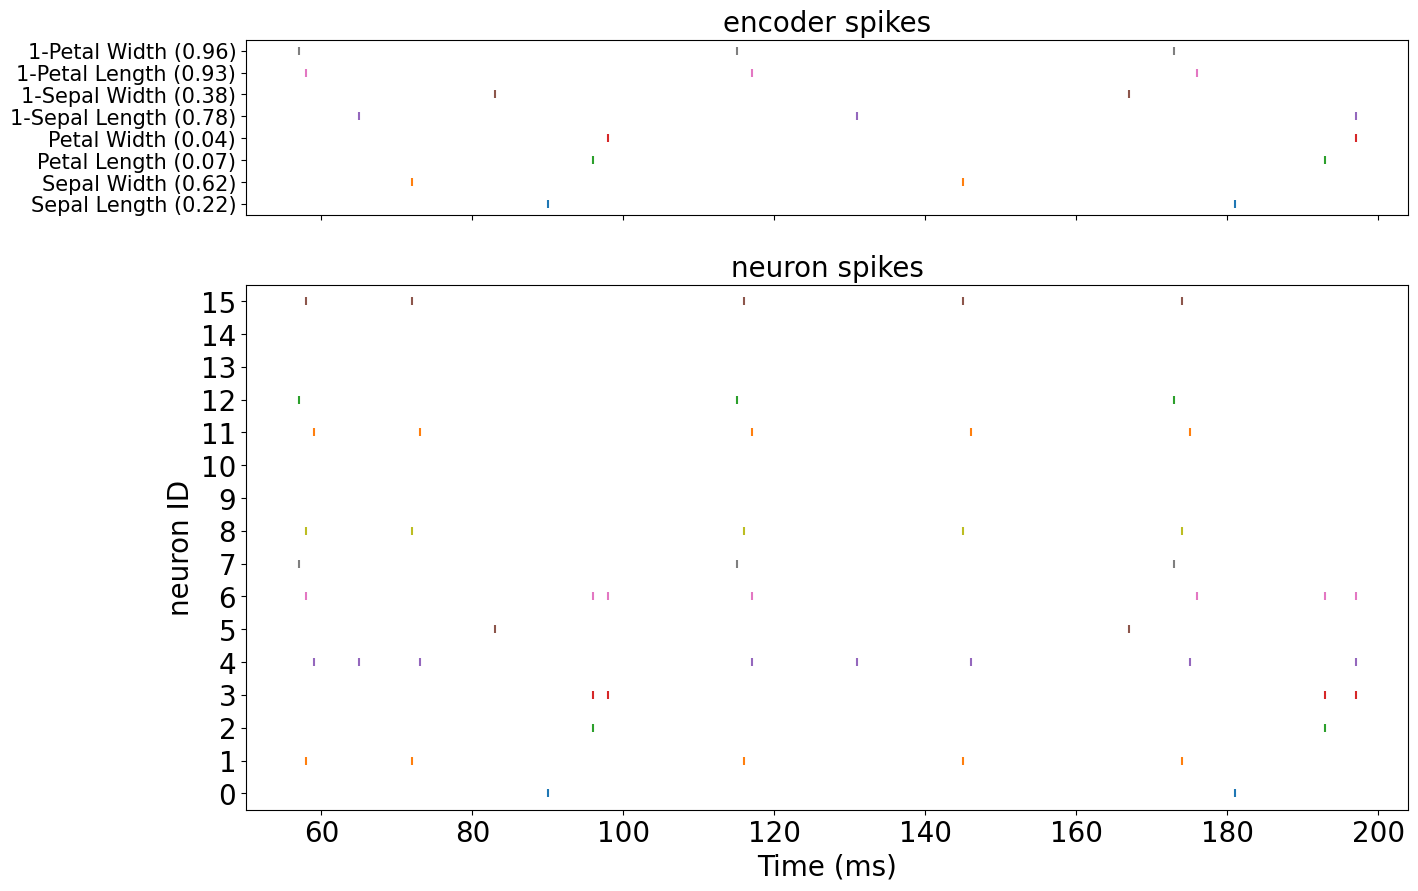

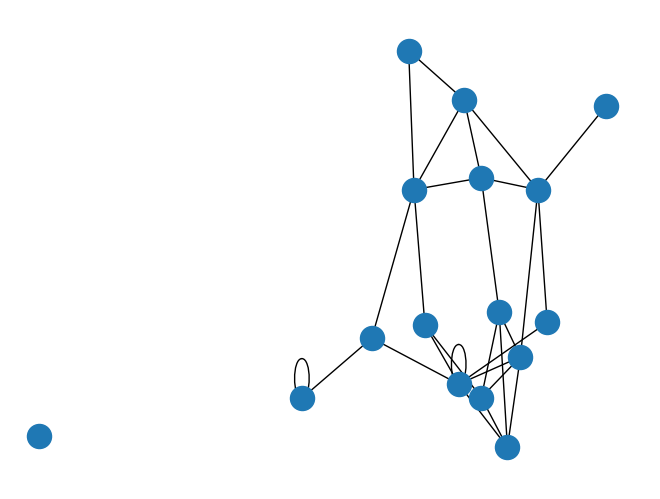

In [2]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

# create a test network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=1.4, high=2.2)) # random number from n_neurons * 2 to n_neurons * 3

neurons = create_network(n_neurons, n_synapses, negative_weights=True, threshold_range=(0.1, 0.4), leak_range=(0.01, 0.15), weight_factor=1.8)

min_f = 100
max_f = 180
sim_f = 10000

encoders = create_encoders(len(attributes)*2, min_f, max_f, sim_f, enc_type='period')

sim_time = 200

enc_inputs = np.append(normalized_iris_data[0], (1-normalized_iris_data[0]))

# feed a test sample into the test network
fires = run_network(neurons, encoders, enc_inputs, sim_time)

reset_network(neurons, encoders)

plot_spikes(fires, attributes + [f'1-{x}' for x in attributes], enc_inputs, sim_time)

plot_network(neurons)